In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
train = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv')

In [3]:
train.head(5)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [4]:
train.shape

(858, 36)

In [5]:
for each in train.columns:
    train[each] = train[each].replace('?', np.nan)

In [6]:
train.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [7]:
features_to_drop=['STDs: Time since first diagnosis','STDs: Time since last diagnosis',
                  'Hormonal Contraceptives (years)','IUD (years)','STDs (number)',
                 ]

In [8]:
train=train.drop(features_to_drop,axis=1)

In [9]:
train['First sexual intercourse'].fillna(train['First sexual intercourse'].median(), inplace=True)
train['Number of sexual partners'].fillna(train['Number of sexual partners'].median(), inplace=True)
train['Num of pregnancies'].fillna(train['Num of pregnancies'].median(), inplace=True)
train['Smokes'].fillna(train['Smokes'].median(), inplace=True)
train['Smokes (years)'].fillna(train['Smokes (years)'].median(), inplace=True)
train['Smokes (packs/year)'].fillna(train['Smokes (packs/year)'].median(), inplace=True)

In [10]:
train.isnull().sum()

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                  0
Smokes (years)                          0
Smokes (packs/year)                     0
Hormonal Contraceptives               108
IUD                                   117
STDs                                  105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HPV                              105
STDs: Number of diagnosis               0
Dx:Cancer                         

In [11]:
for each in train.columns:
    train[each] = train[each].replace(np.nan, '?')

In [12]:
def train_predict_unknown(trainX, trainY, testX):
    forest = RandomForestClassifier(n_estimators=100)
    forest = forest.fit(trainX, trainY)
    test_predictY = forest.predict(testX)
    return pd.DataFrame(test_predictY,index=testX.index)

In [13]:
from sklearn.ensemble import RandomForestClassifier
fill_attrs=['Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','STDs:cervical condylomatosis',
            'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis','STDs:syphilis',
            'STDs:pelvic inflammatory disease','STDs:genital herpes','STDs:molluscum contagiosum',
            'STDs:AIDS','STDs:HIV','STDs:Hepatitis B','STDs:HPV'
            ]

for i in fill_attrs:     
    test_data = train[train[i] == '?']
    testX = test_data.drop(fill_attrs, axis=1)
    train_data = train[train[i] != '?']       
    trainY = list(train_data[i].values)
    trainX = train_data.drop(fill_attrs, axis=1)    
    test_data[i] = train_predict_unknown(trainX, trainY, testX)
    train = pd.concat([train_data, test_data])

/Users/bruce/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


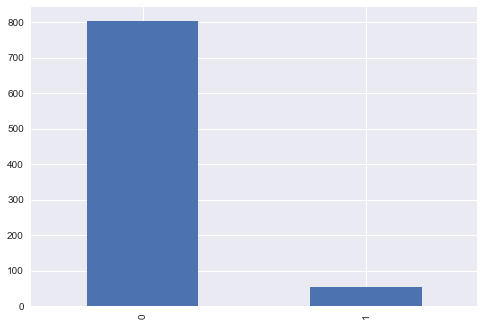

In [14]:
train['Biopsy'].value_counts().sort_index().plot.bar()
plt.show()

In [15]:
train.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
IUD                                   0
STDs                                  0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0
STDs: Number of diagnosis             0
Dx:Cancer                             0
Dx:CIN                                0


In [16]:
features=train.drop('Biopsy',axis=1)
outcomes=train['Biopsy'].values

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, outcomes, test_size=0.25, random_state=10)

# random forest by sklearn

In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [19]:
model=RandomForestClassifier(n_estimators=5)
kfold = KFold(n_splits=10, random_state=0)
cv_result = cross_val_score(model,X_train,Y_train, cv = kfold,scoring = "accuracy")
results=["Ranom Forest",cv_result.mean(),cv_result.std()]

print('{:20s} {:2.2f} (+/-) {:2.2f} '.format(results[0] , results[1] * 100, results[2] * 100))



Ranom Forest         93.78 (+/-) 3.26 


In [20]:
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier()
paramaters = [
             {'n_estimators' : [100, 200, 300, 500, 1000], 
              'max_features' : ['auto','log2',None],
              'max_depth':[3,4,5]
             }                                       
             ]
grid_search = GridSearchCV(estimator = model, 
                           param_grid = paramaters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train,Y_train)
best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_  

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

('Best accuracy : ', 0.95489891135303262)
('Best parameters :', {'max_features': None, 'n_estimators': 300, 'max_depth': 3})


In [21]:
final_model = RandomForestClassifier(n_estimators=300,max_features=None,bootstrap=True,oob_score=True,max_depth=3)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)

from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 


# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[202   2]
 [  1  10]]
98.6046511628
             precision    recall  f1-score   support

          0       1.00      0.99      0.99       204
          1       0.83      0.91      0.87        11

avg / total       0.99      0.99      0.99       215



In [24]:
final_model = RandomForestClassifier(n_estimators=1,max_features=None,bootstrap=False,max_depth=3)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)




[[202   2]
 [  1  10]]
98.6046511628
             precision    recall  f1-score   support

          0       1.00      0.99      0.99       204
          1       0.83      0.91      0.87        11

avg / total       0.99      0.99      0.99       215



# Random forest by Xgboost

In [31]:
final_model = XGBClassifier(n_estimators=100,num_boost_round=1,max_depth=4,subsample=0.632,colsample_bytree=0.375)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)




[[204   0]
 [  0  11]]
100.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       204
          1       1.00      1.00      1.00        11

avg / total       1.00      1.00      1.00       215



# decision tree by xgboost

In [45]:
final_model = XGBClassifier(n_estimators=1,num_boost_round=1,max_depth=4,subsample=1,colsample_bytree=1)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)




[[203   1]
 [  1  10]]
99.0697674419
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       204
          1       0.91      0.91      0.91        11

avg / total       0.99      0.99      0.99       215



# Bagged decision trees

In [48]:
final_model = XGBClassifier(n_estimators=100,num_boost_round=1,max_depth=4,subsample=0.632,colsample_bytree=1)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[203   1]
 [  1  10]]
99.0697674419
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       204
          1       0.91      0.91      0.91        11

avg / total       0.99      0.99      0.99       215



In [18]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint,History
from keras.layers import Dense, Activation, Dropout,Input
from keras import optimizers
history=History()

Using Theano backend.


In [19]:
m = Sequential()
m.add(Dense(128, activation='sigmoid', input_shape=(X_train.shape[1],)))
m.add(Dropout(0.5))
m.add(Dense(128, activation='sigmoid'))
m.add(Dropout(0.5))
m.add(Dense(128, activation='sigmoid'))
m.add(Dropout(0.5))
m.add(Dense(len(np.unique(Y_train)), activation='softmax'))
    
m.compile(
    optimizer=optimizers.Adam(lr=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [38]:
hist=m.fit(
    # Feature matrix
    X_train.values, 
    # Target class one-hot-encoded
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0]).as_matrix(),
    # Iterations to be run if not stopped by EarlyStopping
    epochs=200, 
    callbacks=[
        # Stop iterations when validation loss has not improved
        EarlyStopping(monitor='val_loss', patience=25),
        history,
        # Nice for keeping the last model before overfitting occurs
        ModelCheckpoint(
            'best.model', 
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )
    ],
    verbose=2,
    validation_split=0.2,
    batch_size=132, 
)

Train on 514 samples, validate on 129 samples
Epoch 1/200
Epoch 00000: val_loss improved from inf to 0.10788, saving model to best.model
0s - loss: 0.1216 - acc: 0.9533 - val_loss: 0.1079 - val_acc: 0.9457
Epoch 2/200
Epoch 00001: val_loss did not improve
0s - loss: 0.1189 - acc: 0.9591 - val_loss: 0.1152 - val_acc: 0.9380
Epoch 3/200
Epoch 00002: val_loss did not improve
0s - loss: 0.1102 - acc: 0.9630 - val_loss: 0.1213 - val_acc: 0.9302
Epoch 4/200
Epoch 00003: val_loss did not improve
0s - loss: 0.1117 - acc: 0.9494 - val_loss: 0.1231 - val_acc: 0.9380
Epoch 5/200
Epoch 00004: val_loss did not improve
0s - loss: 0.1033 - acc: 0.9572 - val_loss: 0.1203 - val_acc: 0.9457
Epoch 6/200
Epoch 00005: val_loss did not improve
0s - loss: 0.1081 - acc: 0.9533 - val_loss: 0.1192 - val_acc: 0.9457
Epoch 7/200
Epoch 00006: val_loss did not improve
0s - loss: 0.1141 - acc: 0.9514 - val_loss: 0.1172 - val_acc: 0.9457
Epoch 8/200
Epoch 00007: val_loss did not improve
0s - loss: 0.1023 - acc: 0.953

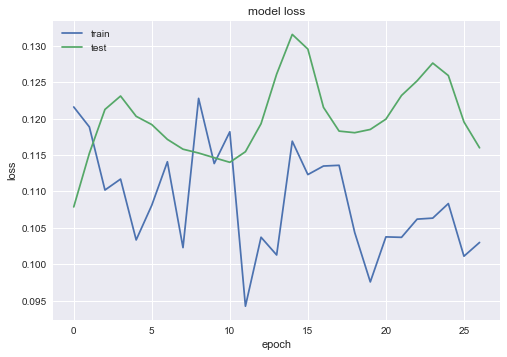

In [40]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
m.load_weights("best.model")
mapping = (
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0], prefix='', prefix_sep='')
    .columns.astype(int).values
)
y_pred_nn = [mapping[pred] for pred in m.predict(X_test.values).argmax(axis=1)]

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred_nn)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred_nn) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred_nn)
print(report)

[[199   5]
 [  0  11]]
97.6744186047
             precision    recall  f1-score   support

          0       1.00      0.98      0.99       204
          1       0.69      1.00      0.81        11

avg / total       0.98      0.98      0.98       215



# New model

In [30]:
from keras.callbacks import EarlyStopping, ModelCheckpoint,History
from keras.models import Model
from keras.layers import Input, Dense
import keras
history = History()


input_1 = Input(shape=(1,))
input_2 = Input(shape=(1,))
input_3 = Input(shape=(1,))
input_4 = Input(shape=(1,))
input_5 = Input(shape=(1,))
input_6 = Input(shape=(1,))
input_7 = Input(shape=(1,))
input_8 = Input(shape=(1,))
input_9 = Input(shape=(1,))
input_10 = Input(shape=(1,))
input_11 = Input(shape=(1,))
input_12= Input(shape=(1,))
input_13= Input(shape=(1,))
input_14= Input(shape=(1,))
input_15 = Input(shape=(1,))
input_16= Input(shape=(1,))
input_17= Input(shape=(1,))
input_18= Input(shape=(1,))
input_19= Input(shape=(1,))
input_20= Input(shape=(1,))
input_21= Input(shape=(1,))
input_22= Input(shape=(1,))
input_23= Input(shape=(1,))
input_24= Input(shape=(1,))
input_25= Input(shape=(1,))
input_26 = Input(shape=(1,))
input_27= Input(shape=(1,))
input_28= Input(shape=(1,))
input_29= Input(shape=(1,))
input_30= Input(shape=(1,))
input_31= Input(shape=(1,))
input_32= Input(shape=(1,))







hidden_1 = Dense(32, activation='sigmoid')(input_1)
hidden_2 = Dense(32, activation='sigmoid')(input_2)
hidden_3 = Dense(32, activation='sigmoid')(input_3)
hidden_4 = Dense(32, activation='sigmoid')(input_4)
hidden_5 = Dense(32, activation='sigmoid')(input_5)
hidden_6 = Dense(32, activation='sigmoid')(input_6)
hidden_7 = Dense(32, activation='sigmoid')(input_7)
hidden_8 = Dense(32, activation='sigmoid')(input_8)
hidden_9 = Dense(32, activation='sigmoid')(input_9)
hidden_10 = Dense(32, activation='sigmoid')(input_10)
hidden_11= Dense(32, activation='sigmoid')(input_11)
hidden_12= Dense(32, activation='sigmoid')(input_12)
hidden_13= Dense(32, activation='sigmoid')(input_13)
hidden_14= Dense(32, activation='sigmoid')(input_14)
hidden_15= Dense(32, activation='sigmoid')(input_15)
hidden_16= Dense(32, activation='sigmoid')(input_16)
hidden_17 = Dense(32, activation='sigmoid')(input_17)
hidden_18= Dense(32, activation='sigmoid')(input_18)
hidden_19= Dense(32, activation='sigmoid')(input_19)
hidden_20 = Dense(32, activation='sigmoid')(input_20)
hidden_21= Dense(32, activation='sigmoid')(input_21)
hidden_22= Dense(32, activation='sigmoid')(input_22)
hidden_23= Dense(32, activation='sigmoid')(input_23)
hidden_24= Dense(32, activation='sigmoid')(input_24)
hidden_25= Dense(32, activation='sigmoid')(input_25)
hidden_26= Dense(32, activation='sigmoid')(input_26)
hidden_27= Dense(32, activation='sigmoid')(input_27)
hidden_28= Dense(32, activation='sigmoid')(input_28)
hidden_29= Dense(32, activation='sigmoid')(input_29)
hidden_30= Dense(32, activation='sigmoid')(input_30)
hidden_31= Dense(32, activation='sigmoid')(input_31)
hidden_32= Dense(32, activation='sigmoid')(input_32)


value_list=[X_train[['Age']].values,
            X_train[['Number of sexual partners']].values,
            X_train[['First sexual intercourse']].values,
            X_train[['Num of pregnancies']].values,
            X_train[['Smokes']].values,
            X_train[['Smokes (years)']].values,
            X_train[['Smokes (packs/year)']].values,
            X_train[['Hormonal Contraceptives']].values,
            X_train[['IUD']].values,
            X_train[['STDs']].values,
            X_train[['STDs:condylomatosis']].values,
            X_train[['STDs:cervical condylomatosis']].values,
            X_train[['STDs:vaginal condylomatosis']].values,
            X_train[['STDs:vulvo-perineal condylomatosis']].values,
            X_train[['STDs:syphilis']].values,
            X_train[['STDs:pelvic inflammatory disease']].values,
            X_train[['STDs:genital herpes']].values,
            X_train[['STDs:molluscum contagiosum']].values,
            X_train[['STDs:AIDS']].values,
            X_train[['STDs:HIV']].values,
            X_train[['STDs:Hepatitis B']].values,
            X_train[['STDs:HPV']].values,
            X_train[['STDs: Number of diagnosis']].values,
            X_train[['Hormonal Contraceptives']].values,
            X_train[['Dx:Cancer']].values,
            X_train[['Dx:CIN']].values,
            X_train[['Dx:HPV']].values,
            X_train[['Dx']].values,
            X_train[['Hinselmann']].values,
            X_train[['Schiller']].values,
            X_train[['Citology']].values,
            X_train[['Hormonal Contraceptives']].values
           ]

value_list_test=[X_test[['Age']].values,
                X_test[['Number of sexual partners']].values,
                X_test[['First sexual intercourse']].values,
                X_test[['Num of pregnancies']].values,
                X_test[['Smokes']].values,
                X_test[['Smokes (years)']].values,
                X_test[['Smokes (packs/year)']].values,
                X_test[['Hormonal Contraceptives']].values,
                X_test[['IUD']].values,
                X_test[['STDs']].values,
                X_test[['STDs:condylomatosis']].values,
                X_test[['STDs:cervical condylomatosis']].values,
                X_test[['STDs:vaginal condylomatosis']].values,
                X_test[['STDs:vulvo-perineal condylomatosis']].values,
                X_test[['STDs:syphilis']].values,
                X_test[['STDs:pelvic inflammatory disease']].values,
                X_test[['STDs:genital herpes']].values,
                X_test[['STDs:molluscum contagiosum']].values,
                X_test[['STDs:AIDS']].values,
                X_test[['STDs:HIV']].values,
                X_test[['STDs:Hepatitis B']].values,
                X_test[['STDs:HPV']].values,
                X_test[['STDs: Number of diagnosis']].values,
                X_test[['Hormonal Contraceptives']].values,
                X_test[['Dx:Cancer']].values,
                X_test[['Dx:CIN']].values,
                X_test[['Dx:HPV']].values,
                X_test[['Dx']].values,
                X_test[['Hinselmann']].values,
                X_test[['Schiller']].values,
                X_test[['Citology']].values,
                X_test[['Hormonal Contraceptives']].values
                
                ]

x = keras.layers.concatenate([hidden_1, hidden_2,hidden_3,hidden_4,hidden_5,hidden_6,hidden_7,hidden_8,
                              hidden_9, hidden_10,hidden_11,hidden_12,hidden_13,hidden_14,hidden_15,hidden_16,
                              hidden_17, hidden_18,hidden_19,hidden_20,hidden_21,hidden_22,hidden_23,hidden_24,
                              hidden_25, hidden_26,hidden_27,hidden_28,hidden_29,hidden_30,hidden_31,hidden_32,
                             ])

x = Dense(96, activation='sigmoid')(x)
output = Dense(len(np.unique(Y_train)), activation='softmax')(x)

model = Model(inputs=[input_1,input_2,input_3,input_4,input_5,input_6,input_7,input_8,
                     input_9,input_10,input_11,input_12,input_13,input_14,input_15,input_16,
                     input_17,input_18,input_19,input_20,input_21,input_22,input_23,input_24,
                     input_25,input_26,input_27,input_28,input_29,input_30,input_31,input_32], outputs=[output])

model.compile(
    optimizer=optimizers.Adam(lr=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

hist=model.fit(
    # Feature matrix
    value_list, 
    # Target class one-hot-encoded
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0]).as_matrix(),
    # Iterations to be run if not stopped by EarlyStopping
    epochs=200, 
    callbacks=[
        # Stop iterations when validation loss has not improved
        EarlyStopping(monitor='val_loss', patience=25),
        history,
        # Nice for keeping the last model before overfitting occurs
        ModelCheckpoint(
            'best.model', 
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )
    ],
    verbose=2,
    validation_split=0.1,
    batch_size=25, 
)



Train on 578 samples, validate on 65 samples
Epoch 1/200
Epoch 00000: val_loss improved from inf to 0.04157, saving model to best.model
0s - loss: 0.4789 - acc: 0.9239 - val_loss: 0.0416 - val_acc: 1.0000
Epoch 2/200
Epoch 00001: val_loss improved from 0.04157 to 0.03905, saving model to best.model
0s - loss: 0.2963 - acc: 0.9239 - val_loss: 0.0391 - val_acc: 1.0000
Epoch 3/200
Epoch 00002: val_loss did not improve
0s - loss: 0.2775 - acc: 0.9239 - val_loss: 0.0585 - val_acc: 1.0000
Epoch 4/200
Epoch 00003: val_loss did not improve
0s - loss: 0.2755 - acc: 0.9239 - val_loss: 0.0715 - val_acc: 1.0000
Epoch 5/200
Epoch 00004: val_loss did not improve
0s - loss: 0.2797 - acc: 0.9239 - val_loss: 0.0763 - val_acc: 1.0000
Epoch 6/200
Epoch 00005: val_loss improved from 0.03905 to 0.03130, saving model to best.model
0s - loss: 0.2750 - acc: 0.9239 - val_loss: 0.0313 - val_acc: 1.0000
Epoch 7/200
Epoch 00006: val_loss improved from 0.03130 to 0.03037, saving model to best.model
0s - loss: 0.28

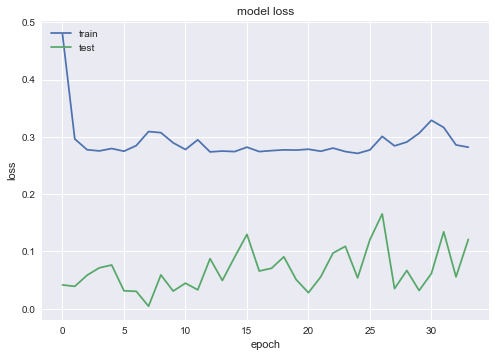

In [31]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
model.load_weights("best.model")
mapping = (
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0], prefix='', prefix_sep='')
    .columns.astype(int).values
)
y_pred_nn = [mapping[pred] for pred in model.predict(value_list_test).argmax(axis=1)]

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred_nn)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred_nn) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred_nn)
print(report)

[[204   0]
 [ 11   0]]
94.8837209302
             precision    recall  f1-score   support

          0       0.95      1.00      0.97       204
          1       0.00      0.00      0.00        11

avg / total       0.90      0.95      0.92       215



# neural network ensemble

In [17]:
from sklearn.model_selection import train_test_split


data_train,data_val=train_test_split(train,test_size=0.25, random_state=10)
X_val=data_val.drop(['Biopsy'], axis=1).values
y_val=data_val['Biopsy'].ravel()

def train_nn_simple(data_train,X_val,y_val):
    

    data_train_new=data_train.sample(frac=0.632,replace=True)
    X_train=data_train_new.drop(['Biopsy'], axis=1).values
    y_train=data_train_new['Biopsy'].ravel()
    
    m = Sequential()
    m.add(Dense(128, activation='sigmoid', input_shape=(X_train.shape[1],)))
    m.add(Dropout(0.5))
    m.add(Dense(128, activation='sigmoid'))
    m.add(Dropout(0.5))
    m.add(Dense(128, activation='sigmoid'))
    m.add(Dropout(0.5))
    m.add(Dense(len(np.unique(y_train)), activation='softmax'))
    
    m.compile(
    optimizer=optimizers.Adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )
    
    m.fit(
    # Feature matrix
    X_train, 
    # Target class one-hot-encoded
    pd.get_dummies(pd.DataFrame(y_train), columns=[0]).as_matrix(),
    # Iterations to be run if not stopped by EarlyStopping
    epochs=200, 
    callbacks=[
        # Stop iterations when validation loss has not improved
        EarlyStopping(monitor='val_loss', patience=25),
        # Nice for keeping the last model before overfitting occurs
        ModelCheckpoint(
            'best.model', 
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )
    ],
    verbose=2,
    validation_split=0.2,
    batch_size=256, 
    )
    m.load_weights("best.model")
    mapping = (
    pd.get_dummies(pd.DataFrame(y_train), columns=[0], prefix='', prefix_sep='')
    .columns.astype(int).values
    )
    y_pred = [mapping[pred] for pred in m.predict(X_val).argmax(axis=1)]
    return y_pred

In [20]:
result=[]
for i in range(50):
    y_pred=train_nn_simple(train,X_val,y_val)
    result.append(y_pred)

Train on 433 samples, validate on 109 samples
Epoch 1/200
Epoch 00000: val_loss improved from inf to 0.48415, saving model to best.model
0s - loss: 0.9601 - acc: 0.4249 - val_loss: 0.4842 - val_acc: 0.9266
Epoch 2/200
Epoch 00001: val_loss improved from 0.48415 to 0.31091, saving model to best.model
0s - loss: 0.5794 - acc: 0.6998 - val_loss: 0.3109 - val_acc: 0.9266
Epoch 3/200
Epoch 00002: val_loss improved from 0.31091 to 0.26375, saving model to best.model
0s - loss: 0.4422 - acc: 0.8129 - val_loss: 0.2637 - val_acc: 0.9266
Epoch 4/200
Epoch 00003: val_loss did not improve
0s - loss: 0.3605 - acc: 0.9030 - val_loss: 0.2685 - val_acc: 0.9266
Epoch 5/200
Epoch 00004: val_loss did not improve
0s - loss: 0.3541 - acc: 0.9169 - val_loss: 0.2875 - val_acc: 0.9266
Epoch 6/200
Epoch 00005: val_loss did not improve
0s - loss: 0.3132 - acc: 0.9169 - val_loss: 0.3064 - val_acc: 0.9266
Epoch 7/200
Epoch 00006: val_loss did not improve
0s - loss: 0.3710 - acc: 0.9122 - val_loss: 0.3211 - val_ac

In [31]:
result_new=np.array(result)
result_new1=result_new.sum(axis=0)
re=result_new1.tolist()
result_new1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 9, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 7, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [32]:
y_pred=[]
for each in re:
    if each>=25:
        y_pred.append(1)
    else:
        y_pred.append(0)
from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(y_val, y_pred)
print(cf)
print(accuracy_score(y_val, y_pred) * 100) 

from sklearn.metrics import classification_report
report = classification_report(y_val, y_pred)
print(report)

[[204   0]
 [ 11   0]]
94.8837209302
             precision    recall  f1-score   support

          0       0.95      1.00      0.97       204
          1       0.00      0.00      0.00        11

avg / total       0.90      0.95      0.92       215

